Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from google.colab import files

Data Loading

In [3]:
data = pd.read_csv('data.csv')

Explore Data

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
null_values = data.isnull().sum()
print('Number of null values: ', len(null_values[null_values>0]))

Number of null values:  0


The dataset contains 6818 records, and there are no missing values in the columns.

Text(0.5, 1.0, 'Class balance')

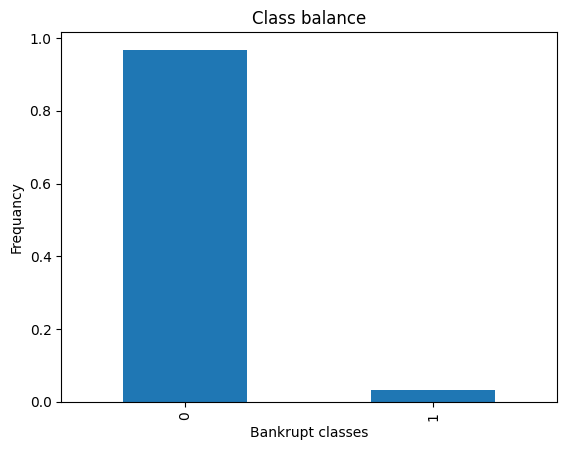

In [6]:
data['Bankrupt?'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance")

In [7]:
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

We can see that our dataset is unbalanced.

The majority class, representing non-bankrupt companies, has 6599 records, while the minority class, representing bankrupt companies, has 220 records.

Text(0.5, 1.0, 'Distribution of Net Income to Total Assets')

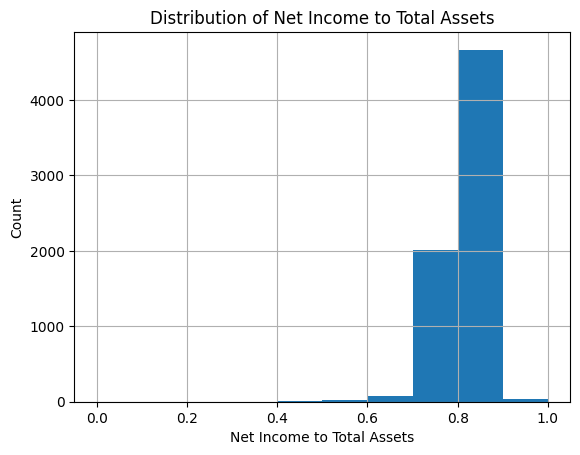

In [12]:
data[' Net Income to Total Assets'].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("Count")
plt.title("Distribution of Net Income to Total Assets")

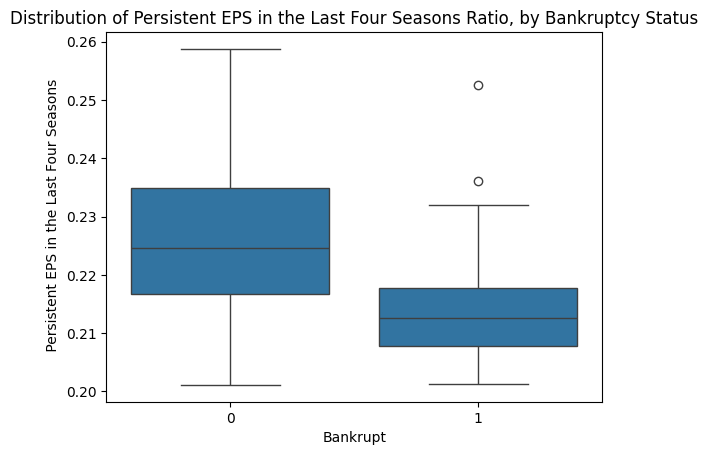

In [13]:
q1, q9 = data[' Persistent EPS in the Last Four Seasons'].quantile([0.1, 0.9])
mask = data[' Persistent EPS in the Last Four Seasons'].between(q1, q9)
sns.boxplot(x = 'Bankrupt?', y = ' Persistent EPS in the Last Four Seasons', data = data[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Persistent EPS in the Last Four Seasons")
plt.title("Distribution of Persistent EPS in the Last Four Seasons Ratio, by Bankruptcy Status");

Text(0.5, 1.0, 'Distribution of Cash Reinvestment %')

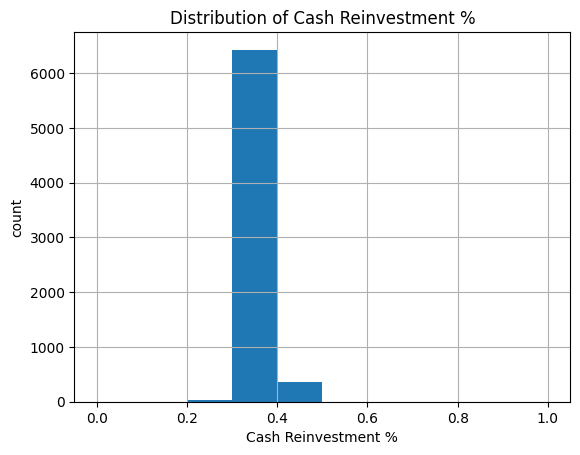

In [21]:
data[' Cash Reinvestment %'].hist()
plt.xlabel("Cash Reinvestment %")
plt.ylabel("count")
plt.title("Distribution of Cash Reinvestment %")

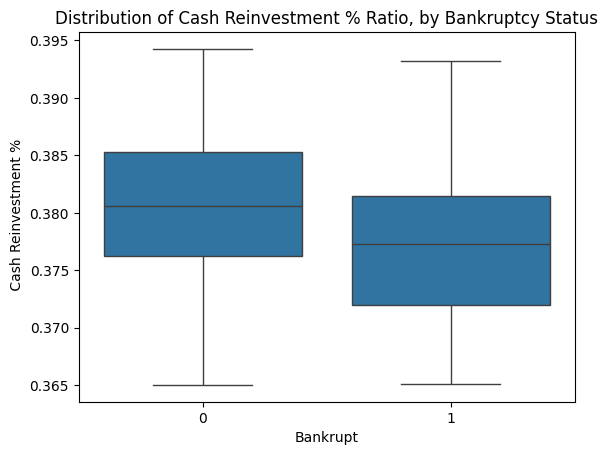

In [20]:
q1, q9 = data[' Cash Reinvestment %'].quantile([0.1, 0.9])
mask = data[' Cash Reinvestment %'].between(q1, q9)
sns.boxplot(x = 'Bankrupt?', y = ' Cash Reinvestment %', data = data[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Cash Reinvestment %")
plt.title("Distribution of Cash Reinvestment % Ratio, by Bankruptcy Status");

Text(0.5, 1.0, 'Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status')

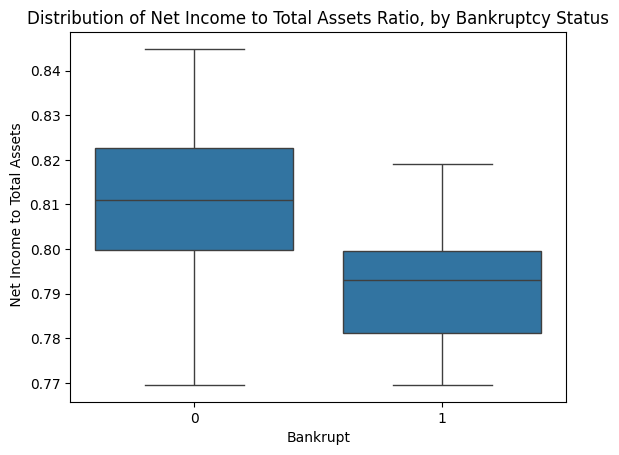

In [16]:
q1, q9 = data[' Net Income to Total Assets'].quantile([0.1, 0.9])
mask = data[" Net Income to Total Assets"].between(q1, q9)
sns.boxplot(x = 'Bankrupt?', y = ' Net Income to Total Assets', data = data[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status")

<Axes: >

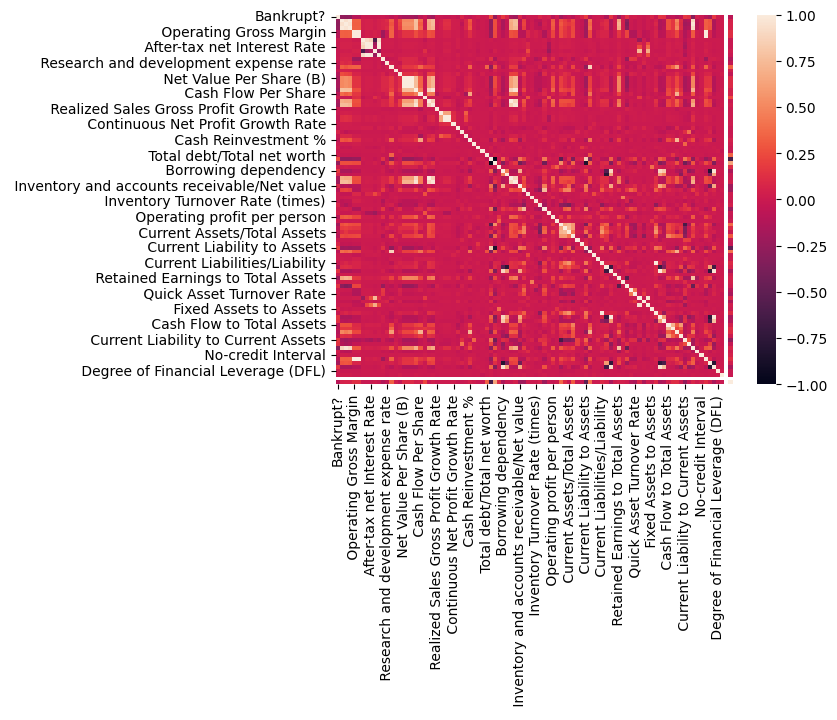

In [22]:
correlation_bankruptcy = data.corr()
sns.heatmap(correlation_bankruptcy)

Definition of the target variable

In [23]:
y = data['Bankrupt?']
X = data.drop(columns='Bankrupt?')

Split the dataset into 70% training data and 30% testing data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
print("Number of bankrupt X_train dataset: ", X_train.shape)
print("Number of bankrupt y_train dataset: ", y_train.shape)
print("Number of bankrupt X_test dataset: ", X_test.shape)
print("Number of bankrupt y_test dataset: ", y_test.shape)

Number of bankrupt X_train dataset:  (4773, 95)
Number of bankrupt y_train dataset:  (4773,)
Number of bankrupt X_test dataset:  (2046, 95)
Number of bankrupt y_test dataset:  (2046,)


Because our dataset is unbalanced, we decided to use the SMOTE method to oversample our training data."

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {}\n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 161
Before Oversampling, counts of label '0': 4612



In [31]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After OverSampling, the shape of train_X: {}".format(X_train_res.shape))
print("After OverSampling, the shape of train_y: {}".format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (9224, 95)
After OverSampling, the shape of train_y: (9224,)
After OverSampling, counts of label '1': 4612
After OverSampling, counts of label '0': 4612


Logistic Regression

In [32]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1987
           1       0.03      0.24      0.06        59

    accuracy                           0.79      2046
   macro avg       0.50      0.52      0.47      2046
weighted avg       0.95      0.79      0.86      2046



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
train_dataset = pd.concat([pd.DataFrame(y_train_res), pd.DataFrame(X_train_res)], axis = 1)
test_dataset = pd.concat([pd.DataFrame(y_test), pd.DataFrame(X_test)], axis = 1)

In [ ]:
train_dataset.to_csv('bankruptTrain.csv', encoding = 'utf-8-sig')
files.download('bankruptTrain.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_dataset.to_csv('bankruptTest.csv', encoding = 'utf-8-sig')
files.download('bankruptTest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>